# Uber Data Analysis - Comprehensive Insights

## Objective
Extract actionable insights around demand patterns across various factors to help Uber better understand demand profile and take appropriate actions.

## Key Questions
1. What are the different variables that influence pickups?
2. Which factor affects the pickups the most? What could be plausible reasons for that?
3. What are your recommendations to Uber management to capitalize on fluctuating demand?


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set style - no grid, 300 dpi
sns.set_style("white")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
%matplotlib inline

print("Libraries imported successfully!")


Libraries imported successfully!


## 1. Data Loading and Exploration


In [2]:
# Load data
df = pd.read_csv('Uber.csv')

# Convert pickup_dt to datetime
df['pickup_dt'] = pd.to_datetime(df['pickup_dt'])

print(f"Dataset shape: {df.shape}")
print(f"\nFirst few rows:")
df.head()


Dataset shape: (29101, 13)

First few rows:


,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
0,2015-01-01 01:00:00,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
1,2015-01-01 01:00:00,Brooklyn,1519,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
2,2015-01-01 01:00:00,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
3,2015-01-01 01:00:00,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
4,2015-01-01 01:00:00,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y


In [3]:
# Data info
print("Data types:")
print(df.dtypes)
print("\nMissing values:")
print(df.isnull().sum())
print("\nBasic statistics:")
df.describe()


Data types:
pickup_dt    datetime64[ns]
borough              object
pickups               int64
spd                 float64
vsb                 float64
temp                float64
dewp                float64
slp                 float64
pcp01               float64
pcp06               float64
pcp24               float64
sd                  float64
hday                 object
dtype: object

Missing values:
pickup_dt       0
borough      3043
pickups         0
spd             0
vsb             0
temp            0
dewp            0
slp             0
pcp01           0
pcp06           0
pcp24           0
sd              0
hday            0
dtype: int64

Basic statistics:


,pickup_dt,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd
count,29101,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000
mean,2015-04-02 01:22:19.005532416,490.215903,5.984924,8.818125,47.669042,30.823065,1017.817938,0.003830,0.026129,0.090464,2.529169
min,2015-01-01 01:00:00,0.000000,0.000000,0.000000,2.000000,-16.000000,991.400000,0.000000,0.000000,0.000000,0.000000
25%,2015-02-15 21:00:00,1.000000,3.000000,9.100000,32.000000,14.000000,1012.500000,0.000000,0.000000,0.000000,0.000000
50%,2015-04-02 07:00:00,54.000000,6.000000,10.000000,46.000000,30.000000,1018.200000,0.000000,0.000000,0.000000,0.000000
75%,2015-05-17 11:00:00,449.000000,8.000000,10.000000,64.500000,50.000000,1022.900000,0.000000,0.000000,0.050000,2.958333
max,2015-06-30 23:00:00,7883.000000,21.000000,10.000000,89.000000,73.000000,1043.400000,0.280000,1.240000,2.100000,19.000000
std,NaN,995.649536,3.699007,2.442897,19.814969,21.283444,7.768796,0.018933,0.093125,0.219402,4.520325


## 2. Data Preparation


In [4]:
# Extract temporal features
df['date'] = df['pickup_dt'].dt.date
df['hour'] = df['pickup_dt'].dt.hour
df['day_of_week'] = df['pickup_dt'].dt.day_name()
df['month'] = df['pickup_dt'].dt.month
df['month_name'] = df['pickup_dt'].dt.month_name()
df['day_of_month'] = df['pickup_dt'].dt.day
df['is_weekend'] = df['pickup_dt'].dt.dayofweek >= 5

# Convert hday to boolean
df['is_holiday'] = df['hday'] == 'Y'

# Handle missing borough values
df['borough'] = df['borough'].fillna('Unknown')

print(f"Date range: {df['pickup_dt'].min()} to {df['pickup_dt'].max()}")
print(f"Total unique dates: {df['date'].nunique()}")
print(f"Boroughs: {df['borough'].unique()}")


Date range: 2015-01-01 01:00:00 to 2015-06-30 23:00:00
Total unique dates: 181
Boroughs: ['Bronx' 'Brooklyn' 'EWR' 'Manhattan' 'Queens' 'Staten Island' 'Unknown']


## 3. Univariate Analysis


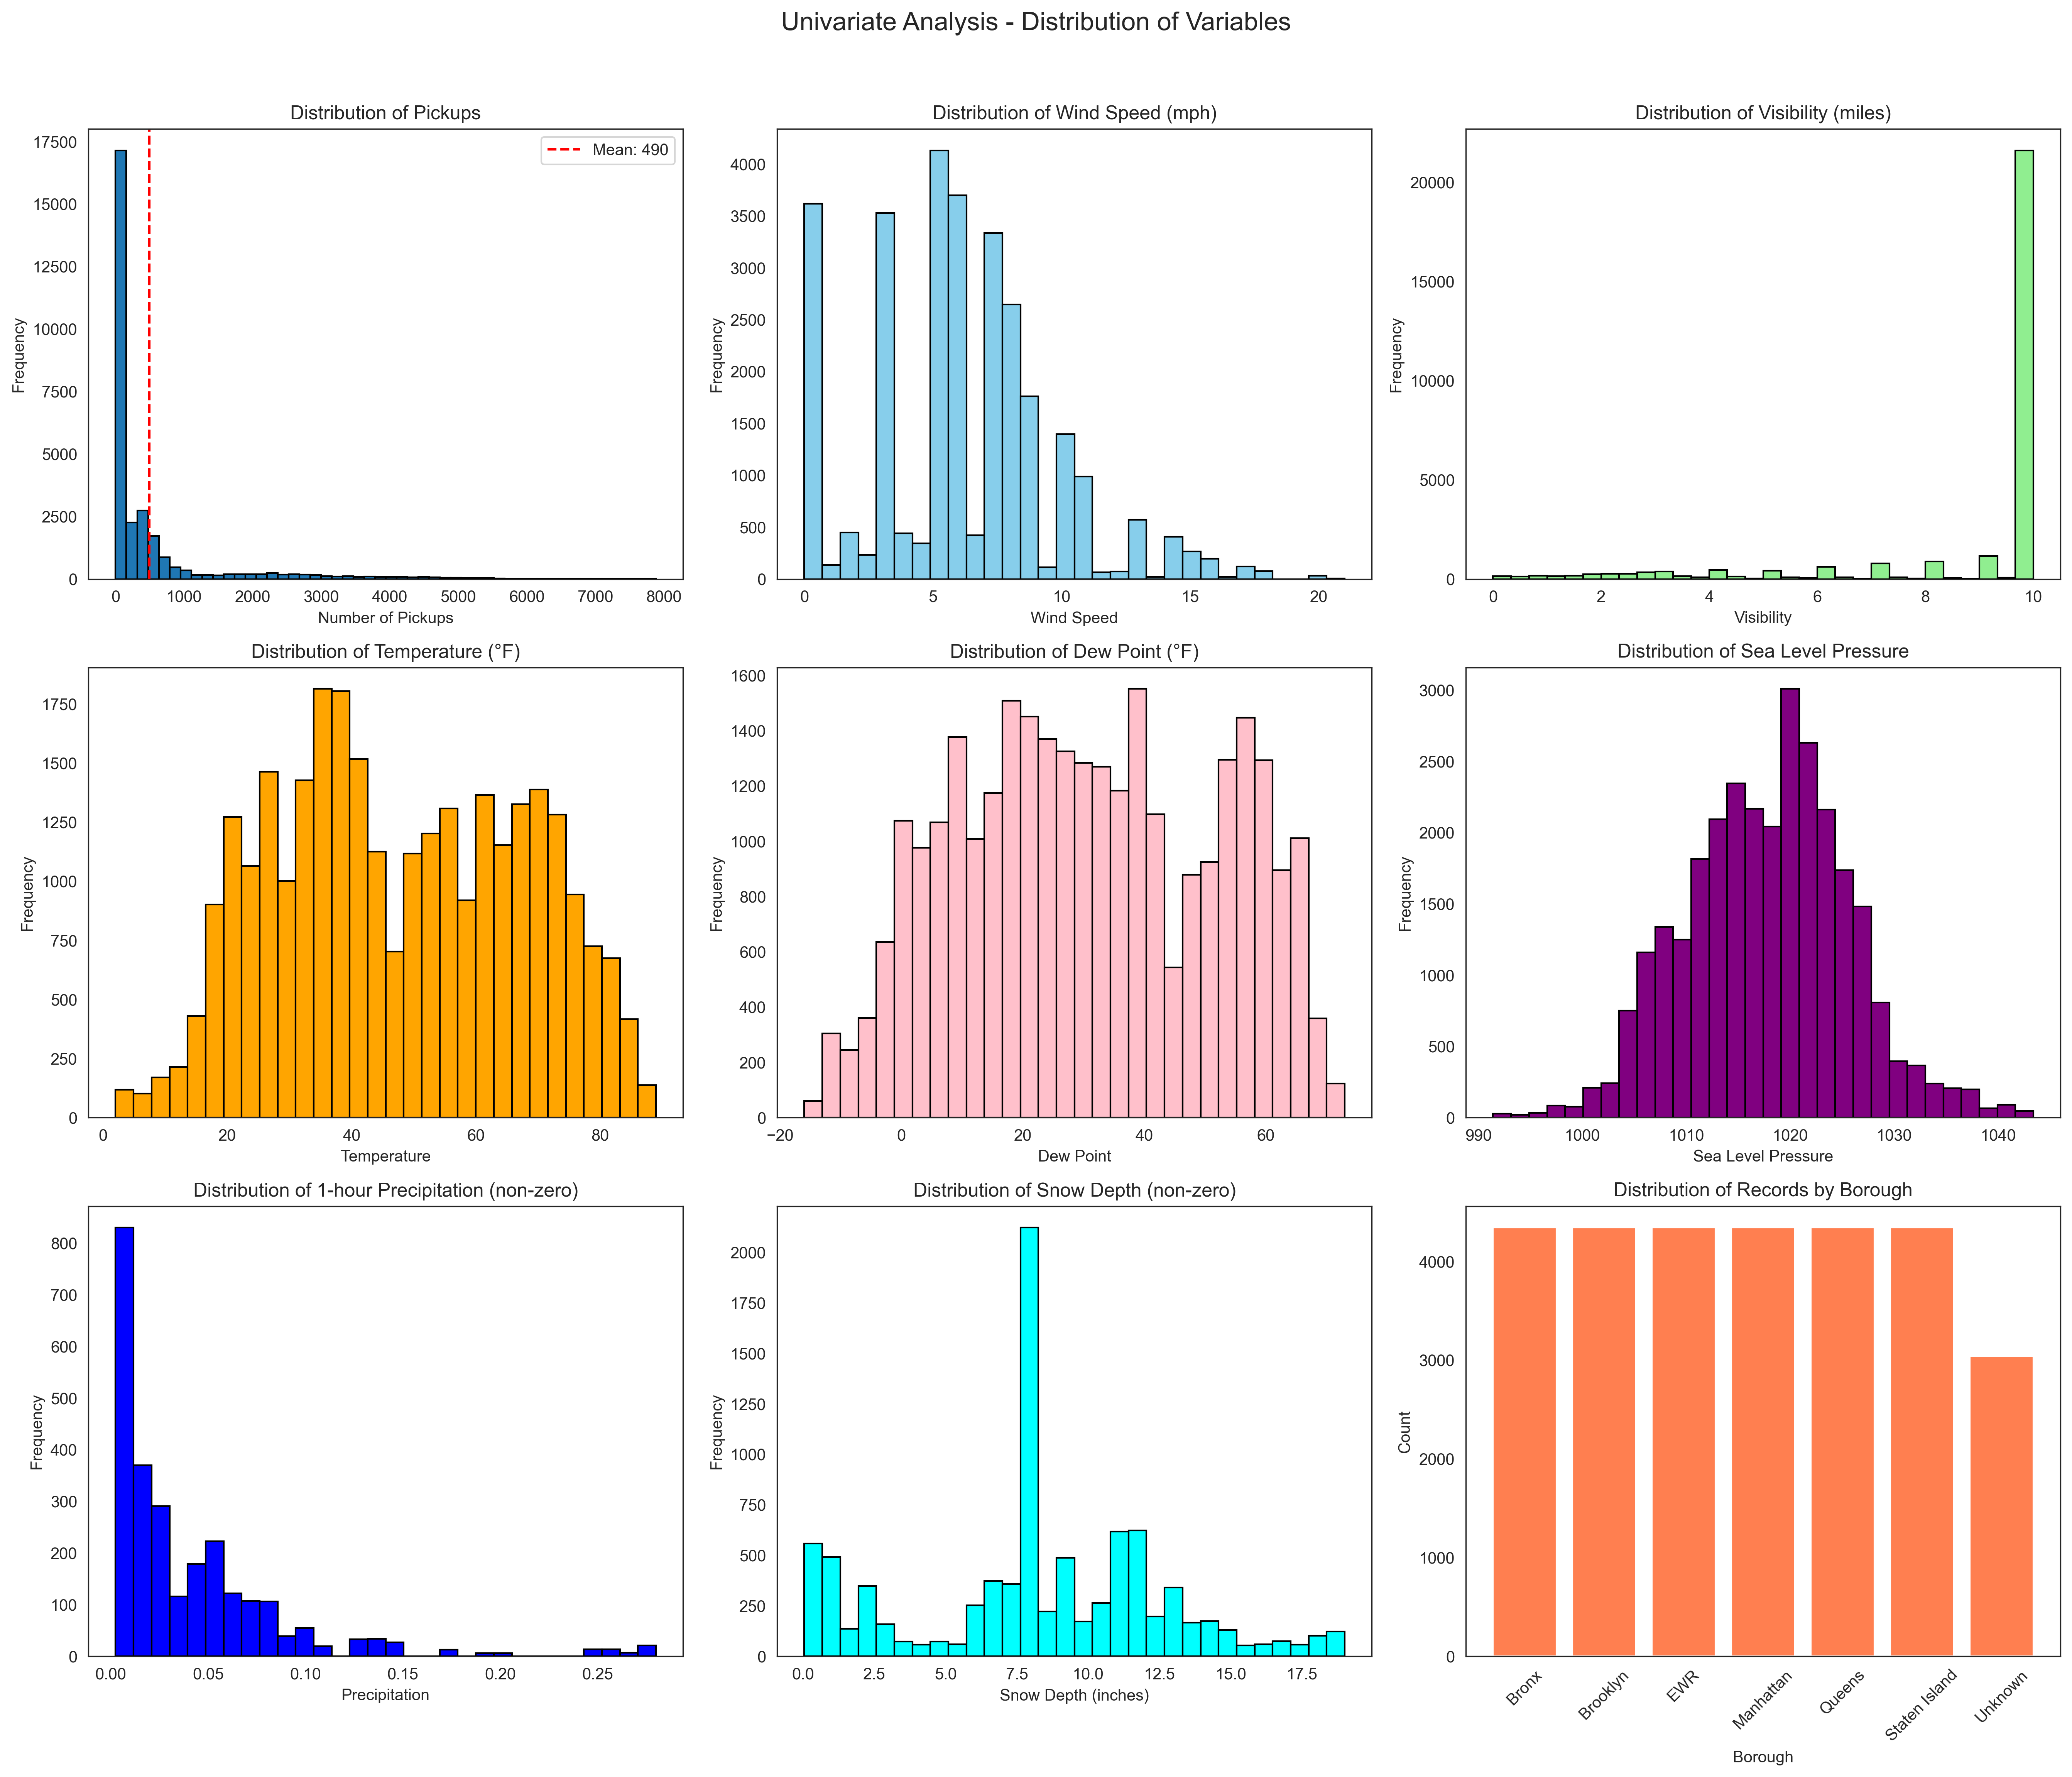


Summary Statistics:
Pickups - Mean: 490.22, Median: 54.00, Std: 995.65
Temperature - Mean: 47.7°F, Range: 2.0 to 89.0°F
Wind Speed - Mean: 6.0 mph, Range: 0.0 to 21.0 mph
Precipitation (1hr) - Non-zero: 2633 records (9.0%)
Snow Depth - Non-zero: 8934 records (30.7%)


In [5]:
# Distribution of Pickups
fig, axes = plt.subplots(3, 3, figsize=(18, 15), dpi=300)
fig.suptitle('Univariate Analysis - Distribution of Variables', fontsize=16, y=1.02)

# 1. Pickups distribution
axes[0, 0].hist(df['pickups'], bins=50, edgecolor='black', alpha=1.0)
axes[0, 0].set_title('Distribution of Pickups')
axes[0, 0].set_xlabel('Number of Pickups')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].axvline(df['pickups'].mean(), color='r', linestyle='--', label=f'Mean: {df["pickups"].mean():.0f}')
axes[0, 0].legend()
axes[0, 0].grid(False)

# 2. Wind Speed
axes[0, 1].hist(df['spd'], bins=30, edgecolor='black', alpha=1.0, color='skyblue')
axes[0, 1].set_title('Distribution of Wind Speed (mph)')
axes[0, 1].set_xlabel('Wind Speed')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].grid(False)

# 3. Visibility
axes[0, 2].hist(df['vsb'], bins=30, edgecolor='black', alpha=1.0, color='lightgreen')
axes[0, 2].set_title('Distribution of Visibility (miles)')
axes[0, 2].set_xlabel('Visibility')
axes[0, 2].set_ylabel('Frequency')
axes[0, 2].grid(False)

# 4. Temperature
axes[1, 0].hist(df['temp'], bins=30, edgecolor='black', alpha=1.0, color='orange')
axes[1, 0].set_title('Distribution of Temperature (°F)')
axes[1, 0].set_xlabel('Temperature')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].grid(False)

# 5. Dew Point
axes[1, 1].hist(df['dewp'], bins=30, edgecolor='black', alpha=1.0, color='pink')
axes[1, 1].set_title('Distribution of Dew Point (°F)')
axes[1, 1].set_xlabel('Dew Point')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].grid(False)

# 6. Sea Level Pressure
axes[1, 2].hist(df['slp'], bins=30, edgecolor='black', alpha=1.0, color='purple')
axes[1, 2].set_title('Distribution of Sea Level Pressure')
axes[1, 2].set_xlabel('Sea Level Pressure')
axes[1, 2].set_ylabel('Frequency')
axes[1, 2].grid(False)

# 7. Precipitation (1-hour)
axes[2, 0].hist(df[df['pcp01'] > 0]['pcp01'], bins=30, edgecolor='black', alpha=1.0, color='blue')
axes[2, 0].set_title('Distribution of 1-hour Precipitation (non-zero)')
axes[2, 0].set_xlabel('Precipitation')
axes[2, 0].set_ylabel('Frequency')
axes[2, 0].grid(False)

# 8. Snow Depth
axes[2, 1].hist(df[df['sd'] > 0]['sd'], bins=30, edgecolor='black', alpha=1.0, color='cyan')
axes[2, 1].set_title('Distribution of Snow Depth (non-zero)')
axes[2, 1].set_xlabel('Snow Depth (inches)')
axes[2, 1].set_ylabel('Frequency')
axes[2, 1].grid(False)

# 9. Borough distribution
borough_counts = df['borough'].value_counts()
axes[2, 2].bar(borough_counts.index, borough_counts.values, color='coral', alpha=1.0)
axes[2, 2].set_title('Distribution of Records by Borough')
axes[2, 2].set_xlabel('Borough')
axes[2, 2].set_ylabel('Count')
axes[2, 2].tick_params(axis='x', rotation=45)
axes[2, 2].grid(False)

plt.tight_layout()
plt.show()

print("\nSummary Statistics:")
print(f"Pickups - Mean: {df['pickups'].mean():.2f}, Median: {df['pickups'].median():.2f}, Std: {df['pickups'].std():.2f}")
print(f"Temperature - Mean: {df['temp'].mean():.1f}°F, Range: {df['temp'].min():.1f} to {df['temp'].max():.1f}°F")
print(f"Wind Speed - Mean: {df['spd'].mean():.1f} mph, Range: {df['spd'].min():.1f} to {df['spd'].max():.1f} mph")
print(f"Precipitation (1hr) - Non-zero: {(df['pcp01'] > 0).sum()} records ({100*(df['pcp01'] > 0).sum()/len(df):.1f}%)")
print(f"Snow Depth - Non-zero: {(df['sd'] > 0).sum()} records ({100*(df['sd'] > 0).sum()/len(df):.1f}%)")


## 4. Bivariate Analysis - Temporal Patterns


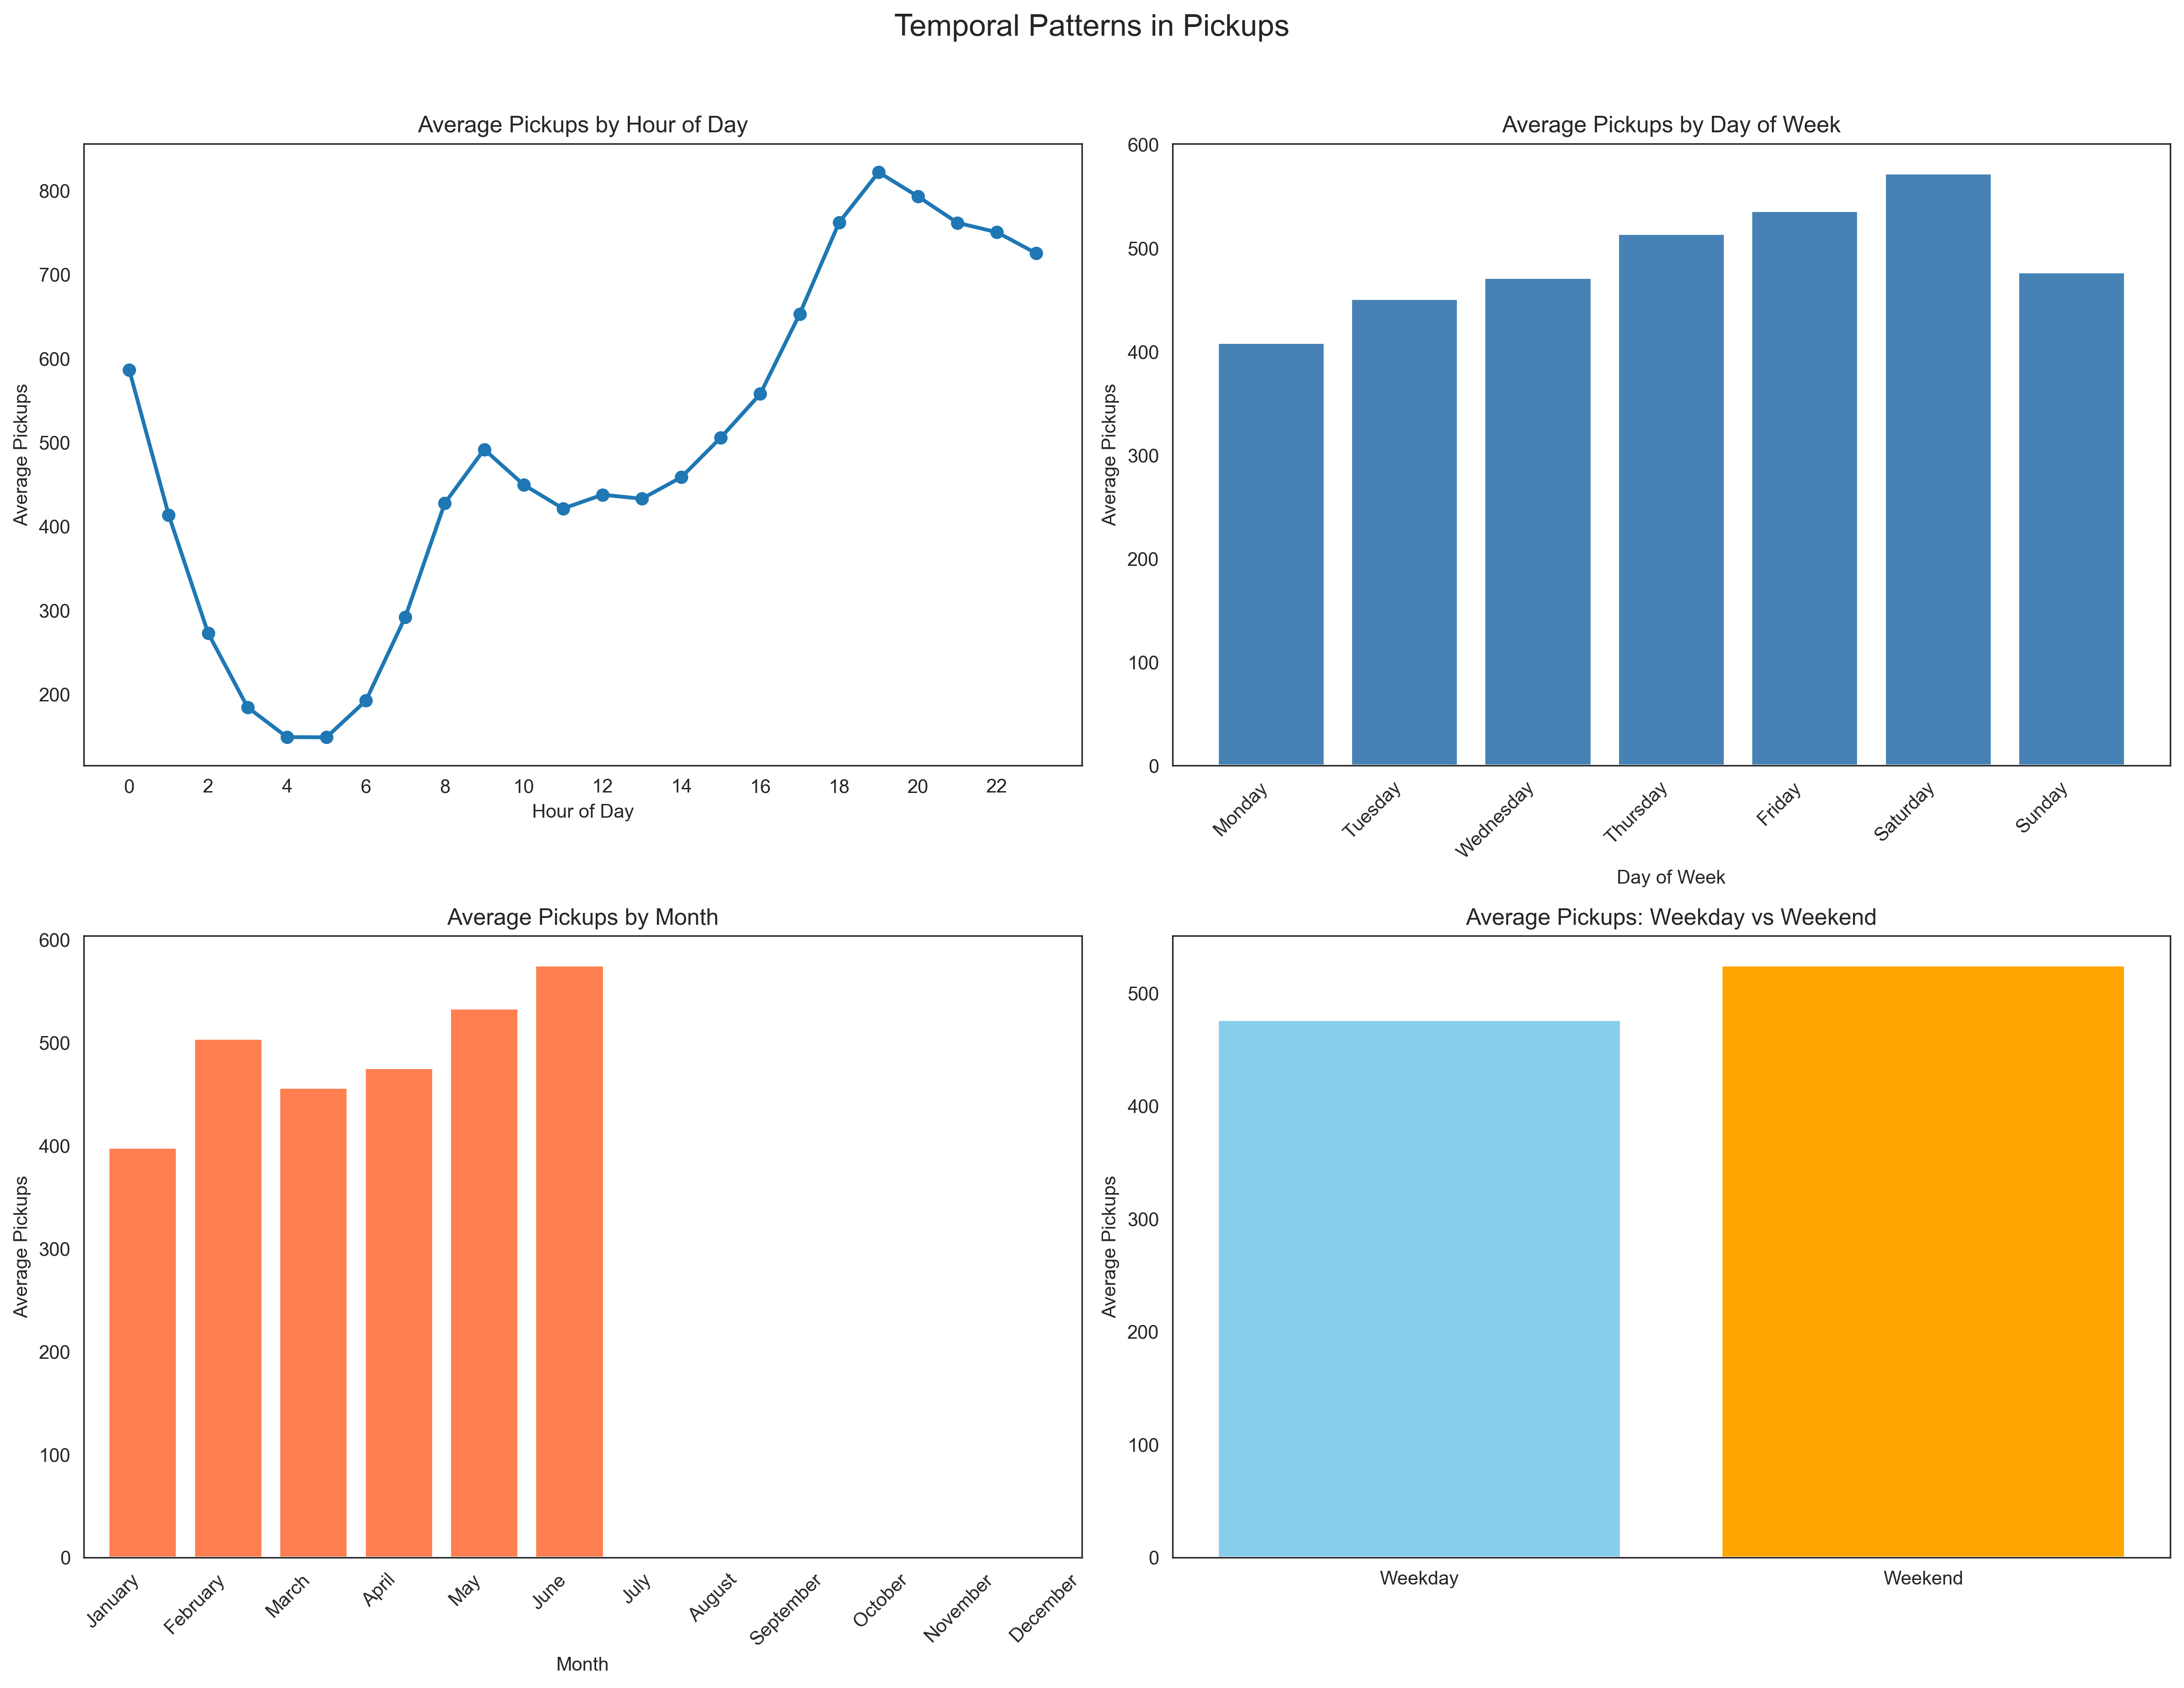


Temporal Insights:
Peak hour: 19:00 (822 avg pickups)
Lowest hour: 5:00 (149 avg pickups)
Peak day: Saturday (572 avg pickups)
Lowest day: Monday (408 avg pickups)
Weekend avg: 524 pickups
Weekday avg: 476 pickups
Weekend/Weekday ratio: 1.10


In [6]:
# Temporal analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12), dpi=300)
fig.suptitle('Temporal Patterns in Pickups', fontsize=16, y=1.02)

# Hourly pattern
hourly_pickups = df.groupby('hour')['pickups'].mean()
axes[0, 0].plot(hourly_pickups.index, hourly_pickups.values, marker='o', linewidth=2, markersize=6)
axes[0, 0].set_title('Average Pickups by Hour of Day')
axes[0, 0].set_xlabel('Hour of Day')
axes[0, 0].set_ylabel('Average Pickups')
axes[0, 0].grid(False)
axes[0, 0].set_xticks(range(0, 24, 2))

# Day of week pattern
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_pickups = df.groupby('day_of_week')['pickups'].mean().reindex(day_order)
axes[0, 1].bar(range(len(day_pickups)), day_pickups.values, color='steelblue', alpha=1.0)
axes[0, 1].set_title('Average Pickups by Day of Week')
axes[0, 1].set_xlabel('Day of Week')
axes[0, 1].set_ylabel('Average Pickups')
axes[0, 1].set_xticks(range(len(day_pickups)))
axes[0, 1].set_xticklabels(day_pickups.index, rotation=45, ha='right')
axes[0, 1].grid(False)

# Monthly pattern
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
month_pickups = df.groupby('month_name')['pickups'].mean().reindex(month_order)
axes[1, 0].bar(range(len(month_pickups)), month_pickups.values, color='coral', alpha=1.0)
axes[1, 0].set_title('Average Pickups by Month')
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_ylabel('Average Pickups')
axes[1, 0].set_xticks(range(len(month_pickups)))
axes[1, 0].set_xticklabels(month_pickups.index, rotation=45, ha='right')
axes[1, 0].grid(False)

# Weekend vs Weekday
weekend_pickups = df.groupby('is_weekend')['pickups'].mean()
axes[1, 1].bar(['Weekday', 'Weekend'], weekend_pickups.values, color=['skyblue', 'orange'], alpha=1.0)
axes[1, 1].set_title('Average Pickups: Weekday vs Weekend')
axes[1, 1].set_ylabel('Average Pickups')
axes[1, 1].grid(False)

plt.tight_layout()
plt.show()

print(f"\nTemporal Insights:")
print(f"Peak hour: {hourly_pickups.idxmax()}:00 ({hourly_pickups.max():.0f} avg pickups)")
print(f"Lowest hour: {hourly_pickups.idxmin()}:00 ({hourly_pickups.min():.0f} avg pickups)")
print(f"Peak day: {day_pickups.idxmax()} ({day_pickups.max():.0f} avg pickups)")
print(f"Lowest day: {day_pickups.idxmin()} ({day_pickups.min():.0f} avg pickups)")
print(f"Weekend avg: {weekend_pickups[True]:.0f} pickups")
print(f"Weekday avg: {weekend_pickups[False]:.0f} pickups")
print(f"Weekend/Weekday ratio: {weekend_pickups[True]/weekend_pickups[False]:.2f}")


## 5. Bivariate Analysis - Borough Patterns


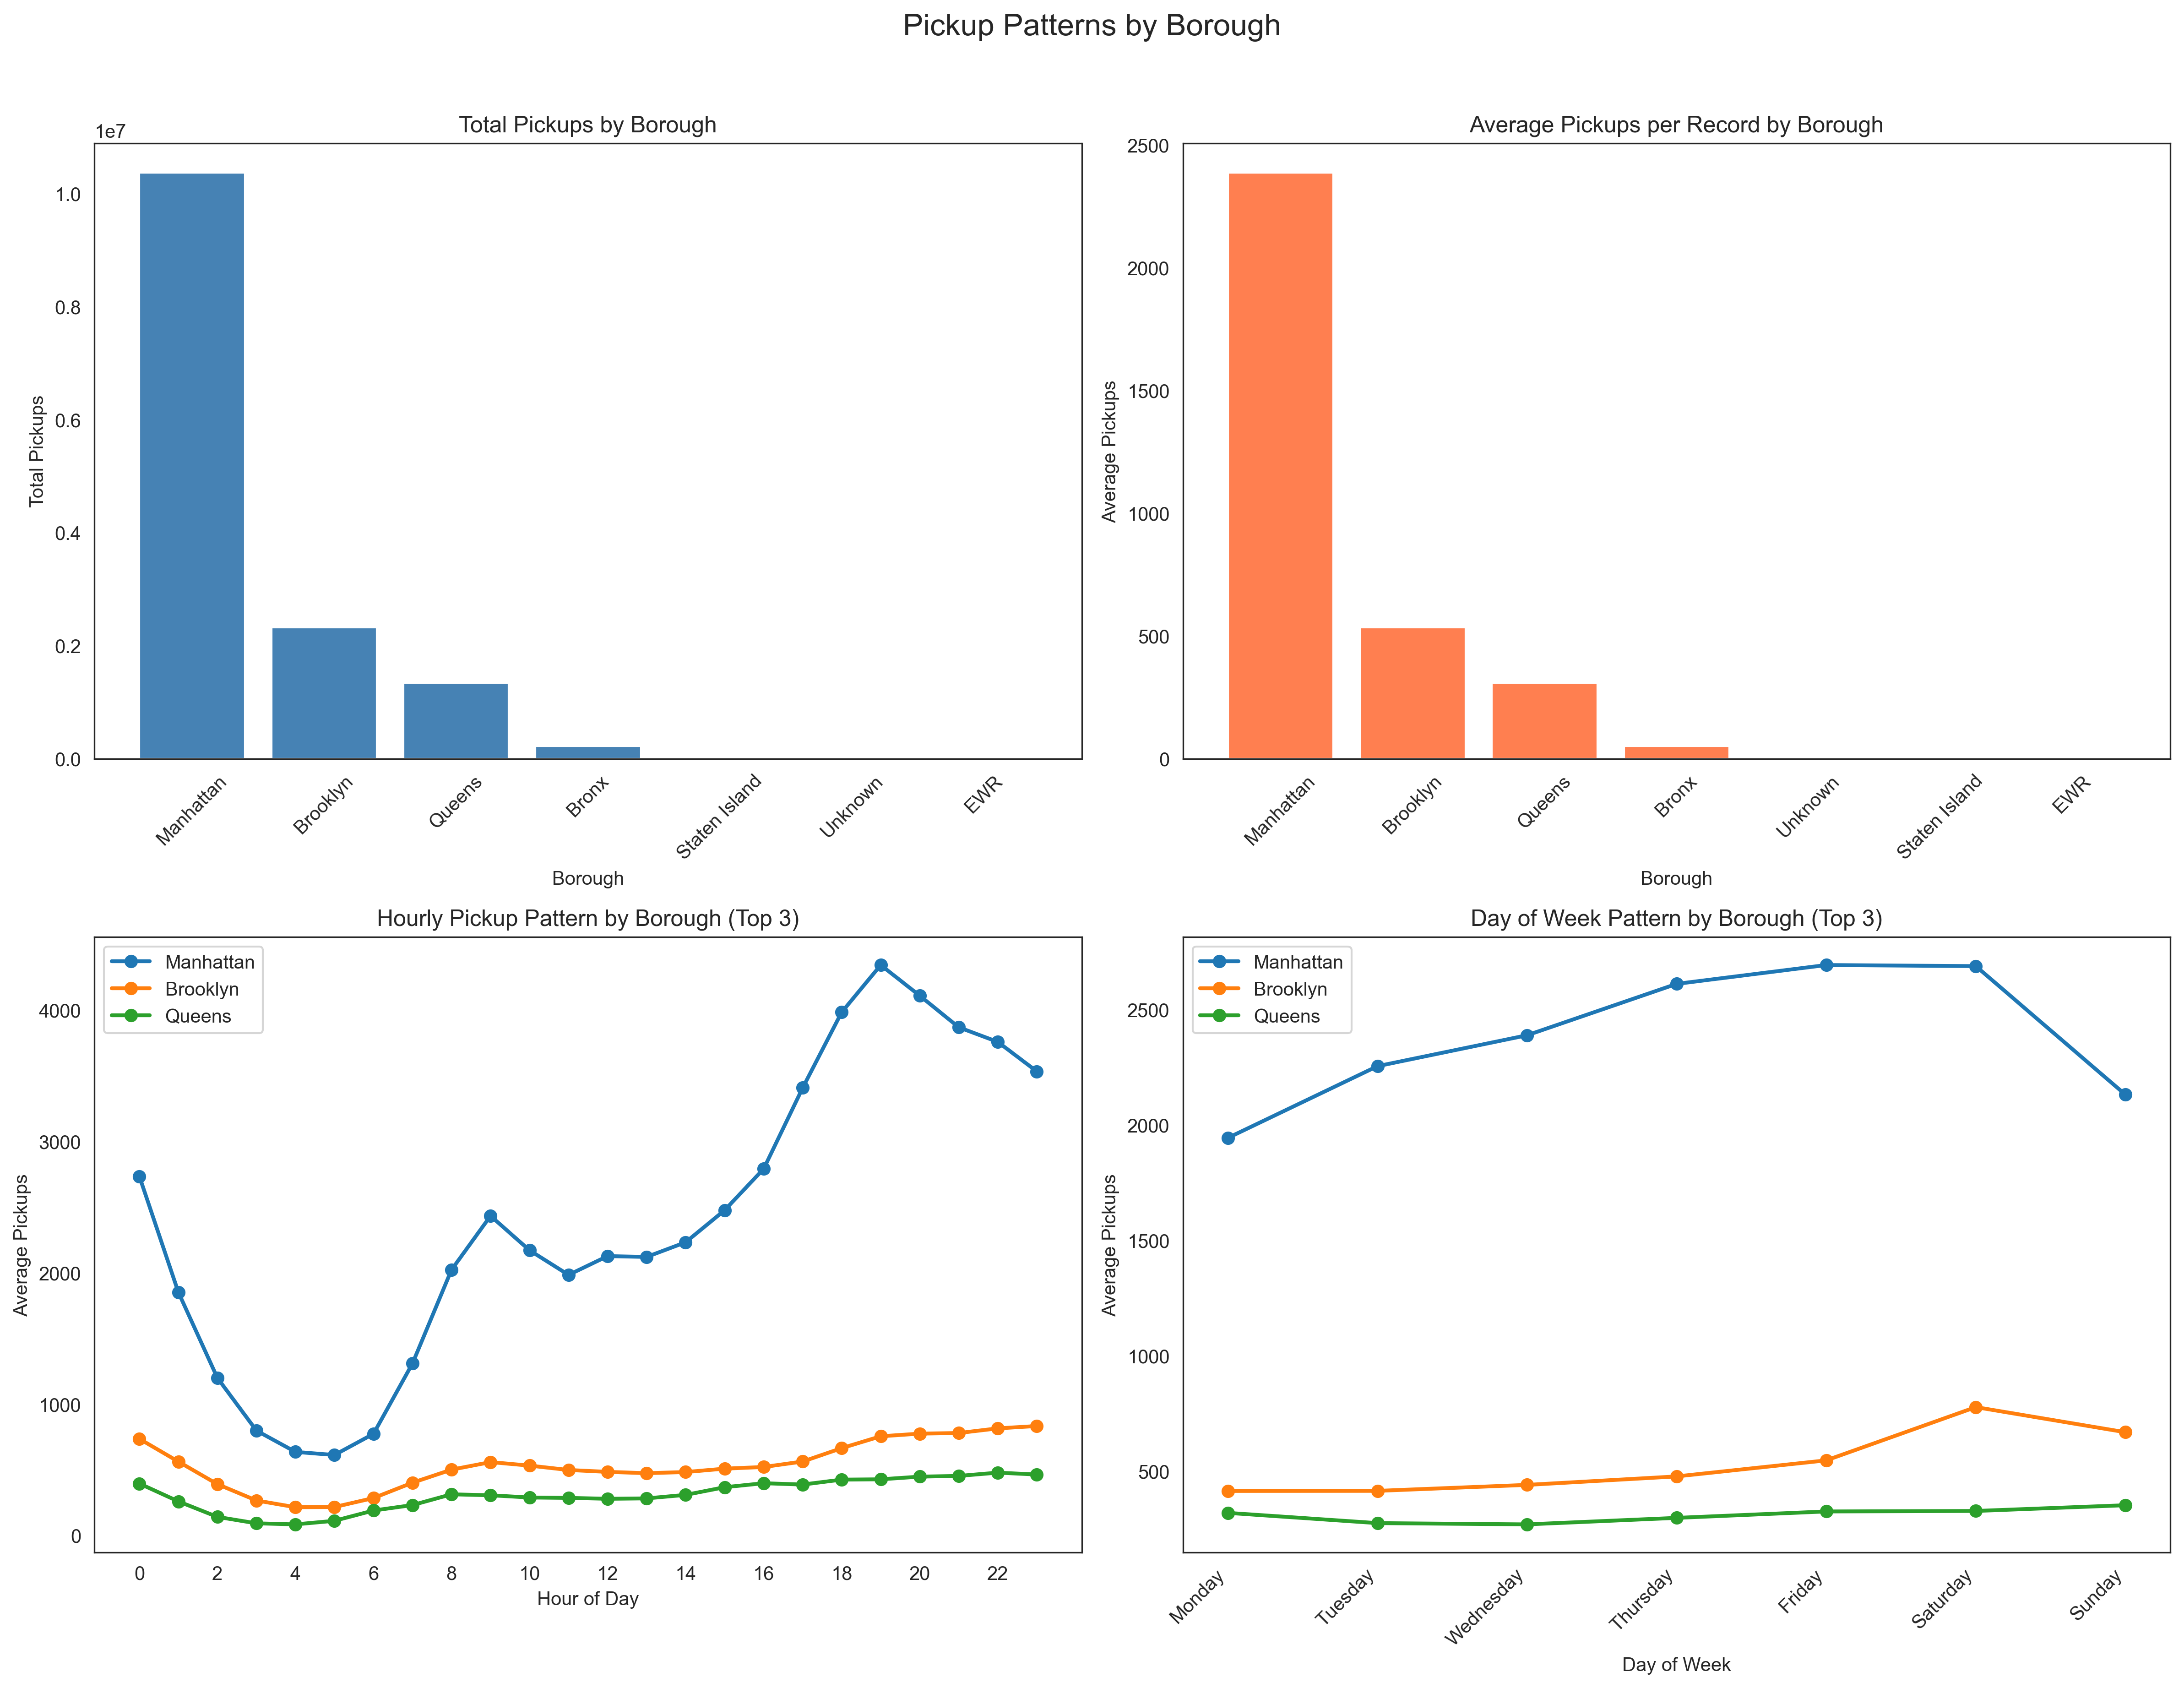


Borough Insights:
Manhattan: Total=10,367,841, Avg=2387.3
Brooklyn: Total=2,321,035, Avg=534.4
Queens: Total=1,343,528, Avg=309.4
Bronx: Total=220,047, Avg=50.7
Staten Island: Total=6,957, Avg=1.6
Unknown: Total=6,260, Avg=2.1
EWR: Total=105, Avg=0.0


In [7]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12), dpi=300)
fig.suptitle('Pickup Patterns by Borough', fontsize=16, y=1.02)

# Total pickups by borough
borough_total = df.groupby('borough')['pickups'].sum().sort_values(ascending=False)
axes[0, 0].bar(borough_total.index, borough_total.values, color='steelblue', alpha=1.0)
axes[0, 0].set_title('Total Pickups by Borough')
axes[0, 0].set_xlabel('Borough')
axes[0, 0].set_ylabel('Total Pickups')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(False)

# Average pickups by borough
borough_avg = df.groupby('borough')['pickups'].mean().sort_values(ascending=False)
axes[0, 1].bar(borough_avg.index, borough_avg.values, color='coral', alpha=1.0)
axes[0, 1].set_title('Average Pickups per Record by Borough')
axes[0, 1].set_xlabel('Borough')
axes[0, 1].set_ylabel('Average Pickups')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(False)

# Hourly pattern by borough (top 3)
top_boroughs = borough_total.head(3).index
for borough in top_boroughs:
    borough_hourly = df[df['borough'] == borough].groupby('hour')['pickups'].mean()
    axes[1, 0].plot(borough_hourly.index, borough_hourly.values, marker='o', label=borough, linewidth=2)
axes[1, 0].set_title('Hourly Pickup Pattern by Borough (Top 3)')
axes[1, 0].set_xlabel('Hour of Day')
axes[1, 0].set_ylabel('Average Pickups')
axes[1, 0].legend()
axes[1, 0].grid(False)
axes[1, 0].set_xticks(range(0, 24, 2))

# Day of week pattern by borough (top 3)
for borough in top_boroughs:
    borough_daily = df[df['borough'] == borough].groupby('day_of_week')['pickups'].mean().reindex(day_order)
    axes[1, 1].plot(range(len(borough_daily)), borough_daily.values, marker='o', label=borough, linewidth=2)
axes[1, 1].set_title('Day of Week Pattern by Borough (Top 3)')
axes[1, 1].set_xlabel('Day of Week')
axes[1, 1].set_ylabel('Average Pickups')
axes[1, 1].set_xticks(range(len(day_order)))
axes[1, 1].set_xticklabels(day_order, rotation=45, ha='right')
axes[1, 1].legend()
axes[1, 1].grid(False)

plt.tight_layout()
plt.show()

print("\nBorough Insights:")
for borough in borough_total.index:
    print(f"{borough}: Total={borough_total[borough]:,.0f}, Avg={borough_avg[borough]:.1f}")


## 6. Bivariate Analysis - Weather Impact on Pickups


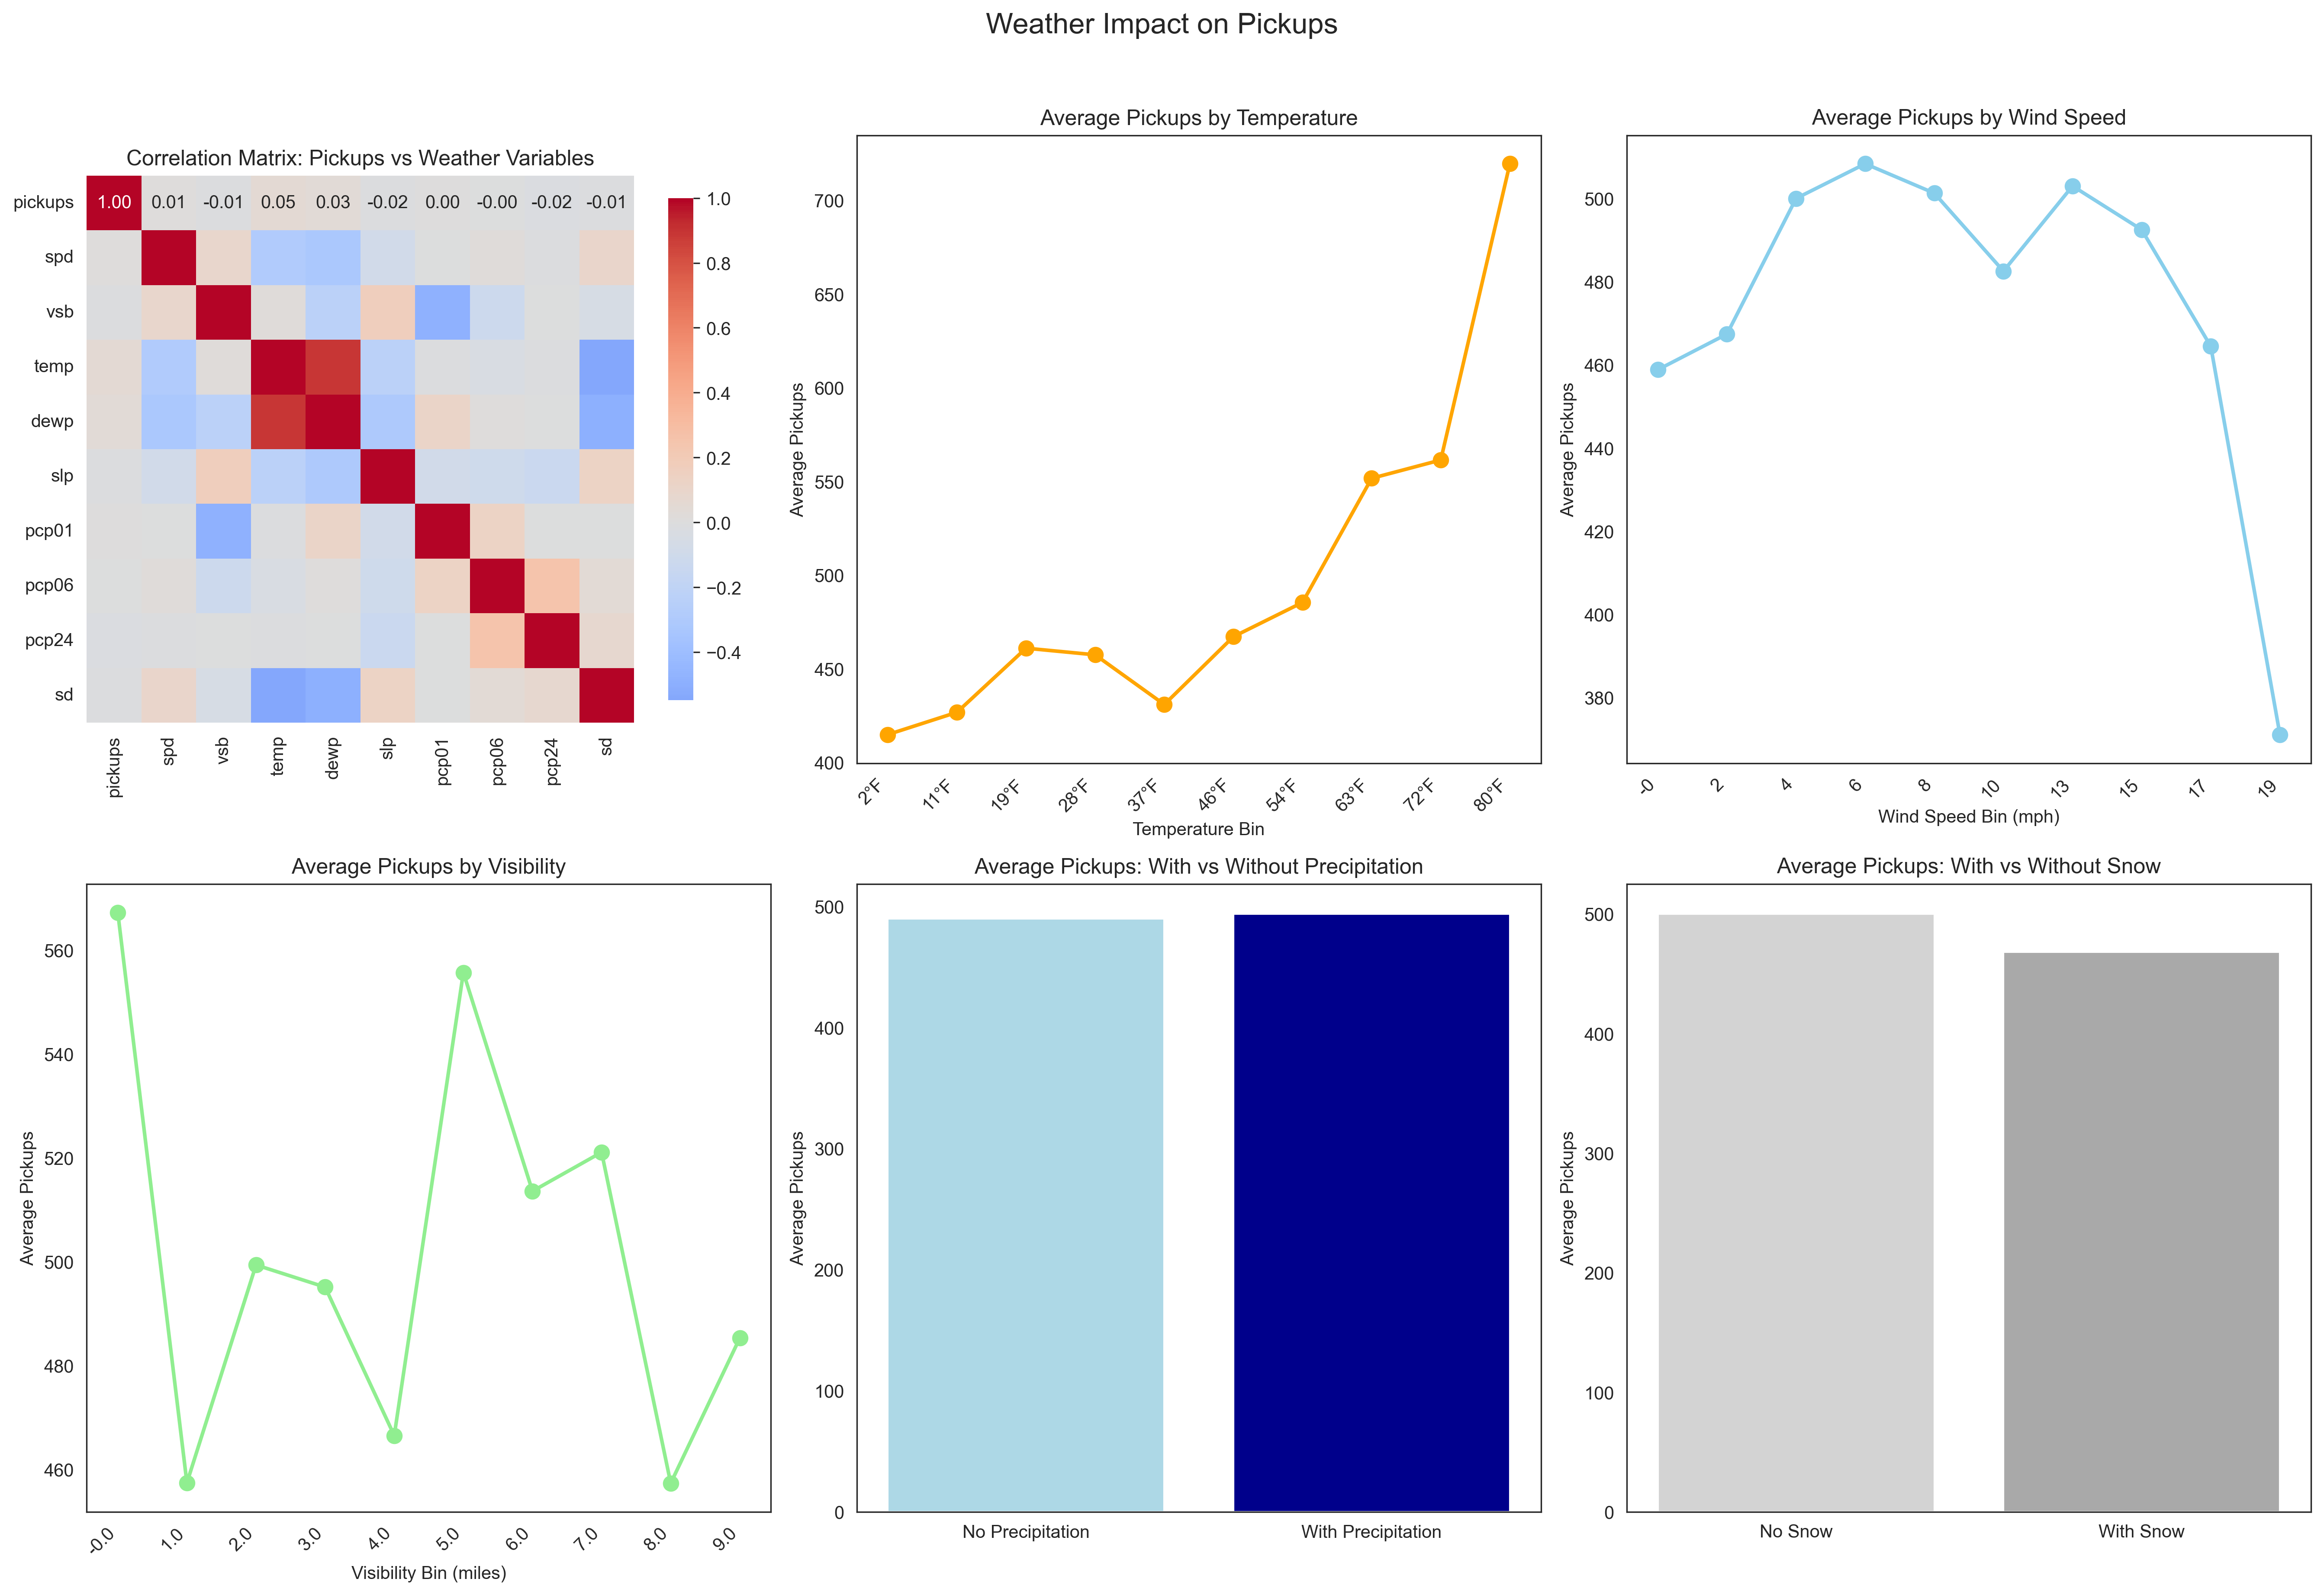


Weather Correlation with Pickups:
temp      :  0.055
dewp      :  0.033
spd       :  0.011
pcp01     :  0.004
pcp06     : -0.003
vsb       : -0.007
sd        : -0.008
slp       : -0.015
pcp24     : -0.020


In [8]:
# Correlation analysis
numeric_cols = ['pickups', 'spd', 'vsb', 'temp', 'dewp', 'slp', 'pcp01', 'pcp06', 'pcp24', 'sd']
correlation_matrix = df[numeric_cols].corr()

fig, axes = plt.subplots(2, 3, figsize=(18, 12), dpi=300)
fig.suptitle('Weather Impact on Pickups', fontsize=16, y=1.02)

# Correlation heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, ax=axes[0, 0], cbar_kws={'shrink': 0.8})
axes[0, 0].set_title('Correlation Matrix: Pickups vs Weather Variables')

# Temperature vs Pickups
df['temp_bin'] = pd.cut(df['temp'], bins=10)
temp_pickups = df.groupby('temp_bin')['pickups'].mean()
axes[0, 1].plot(range(len(temp_pickups)), temp_pickups.values, marker='o', linewidth=2, markersize=8, color='orange')
axes[0, 1].set_title('Average Pickups by Temperature')
axes[0, 1].set_xlabel('Temperature Bin')
axes[0, 1].set_ylabel('Average Pickups')
axes[0, 1].set_xticks(range(len(temp_pickups)))
axes[0, 1].set_xticklabels([f"{t.left:.0f}°F" for t in temp_pickups.index], rotation=45, ha='right')
axes[0, 1].grid(False)

# Wind Speed vs Pickups
df['spd_bin'] = pd.cut(df['spd'], bins=10)
spd_pickups = df.groupby('spd_bin')['pickups'].mean()
axes[0, 2].plot(range(len(spd_pickups)), spd_pickups.values, marker='o', linewidth=2, markersize=8, color='skyblue')
axes[0, 2].set_title('Average Pickups by Wind Speed')
axes[0, 2].set_xlabel('Wind Speed Bin (mph)')
axes[0, 2].set_ylabel('Average Pickups')
axes[0, 2].set_xticks(range(len(spd_pickups)))
axes[0, 2].set_xticklabels([f"{s.left:.0f}" for s in spd_pickups.index], rotation=45, ha='right')
axes[0, 2].grid(False)

# Visibility vs Pickups
df['vsb_bin'] = pd.cut(df['vsb'], bins=10)
vsb_pickups = df.groupby('vsb_bin')['pickups'].mean()
axes[1, 0].plot(range(len(vsb_pickups)), vsb_pickups.values, marker='o', linewidth=2, markersize=8, color='lightgreen')
axes[1, 0].set_title('Average Pickups by Visibility')
axes[1, 0].set_xlabel('Visibility Bin (miles)')
axes[1, 0].set_ylabel('Average Pickups')
axes[1, 0].set_xticks(range(len(vsb_pickups)))
axes[1, 0].set_xticklabels([f"{v.left:.1f}" for v in vsb_pickups.index], rotation=45, ha='right')
axes[1, 0].grid(False)

# Precipitation impact
precip_comparison = df.groupby(df['pcp01'] > 0)['pickups'].mean()
axes[1, 1].bar(['No Precipitation', 'With Precipitation'], precip_comparison.values, 
               color=['lightblue', 'darkblue'], alpha=1.0)
axes[1, 1].set_title('Average Pickups: With vs Without Precipitation')
axes[1, 1].set_ylabel('Average Pickups')
axes[1, 1].grid(False)

# Snow impact
snow_comparison = df.groupby(df['sd'] > 0)['pickups'].mean()
axes[1, 2].bar(['No Snow', 'With Snow'], snow_comparison.values, 
               color=['lightgray', 'darkgray'], alpha=1.0)
axes[1, 2].set_title('Average Pickups: With vs Without Snow')
axes[1, 2].set_ylabel('Average Pickups')
axes[1, 2].grid(False)

plt.tight_layout()
plt.show()

# Print correlation insights
print("\nWeather Correlation with Pickups:")
pickup_corr = correlation_matrix['pickups'].sort_values(ascending=False)
for var, corr in pickup_corr.items():
    if var != 'pickups':
        print(f"{var:10s}: {corr:6.3f}")


## 7. Bivariate Analysis - Holiday Impact


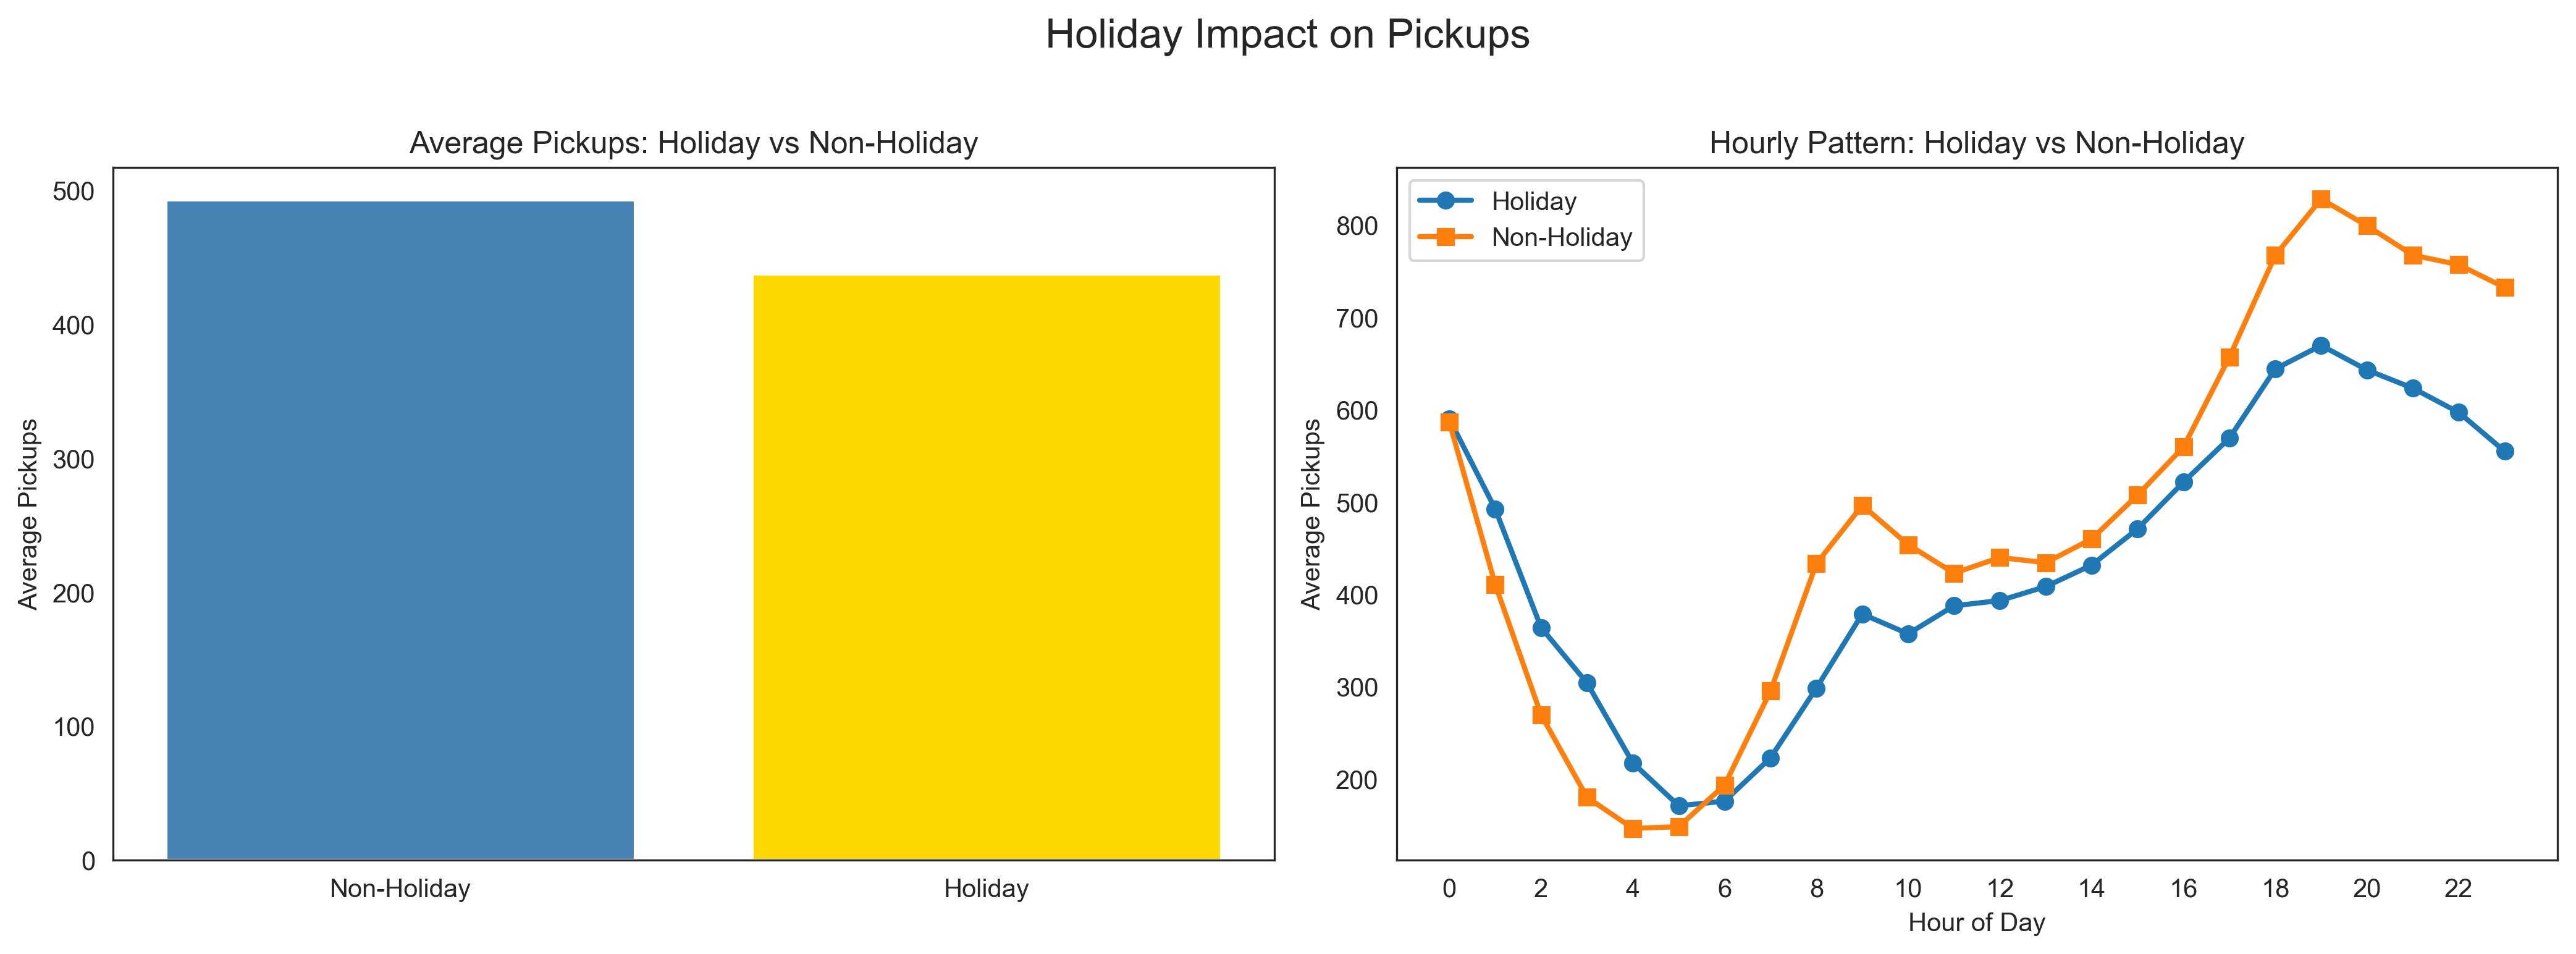


Holiday Insights:
Holiday average: 437 pickups
Non-holiday average: 492 pickups
Difference: -55 pickups (-11.2%)


In [9]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5), dpi=300)
fig.suptitle('Holiday Impact on Pickups', fontsize=16, y=1.02)

# Holiday vs Non-holiday
holiday_pickups = df.groupby('is_holiday')['pickups'].mean()
axes[0].bar(['Non-Holiday', 'Holiday'], holiday_pickups.values, color=['steelblue', 'gold'], alpha=1.0)
axes[0].set_title('Average Pickups: Holiday vs Non-Holiday')
axes[0].set_ylabel('Average Pickups')
axes[0].grid(False)

# Holiday hourly pattern
holiday_hourly = df[df['is_holiday']].groupby('hour')['pickups'].mean()
nonholiday_hourly = df[~df['is_holiday']].groupby('hour')['pickups'].mean()
axes[1].plot(holiday_hourly.index, holiday_hourly.values, marker='o', label='Holiday', linewidth=2)
axes[1].plot(nonholiday_hourly.index, nonholiday_hourly.values, marker='s', label='Non-Holiday', linewidth=2)
axes[1].set_title('Hourly Pattern: Holiday vs Non-Holiday')
axes[1].set_xlabel('Hour of Day')
axes[1].set_ylabel('Average Pickups')
axes[1].legend()
axes[1].grid(False)
axes[1].set_xticks(range(0, 24, 2))

plt.tight_layout()
plt.show()

print(f"\nHoliday Insights:")
print(f"Holiday average: {holiday_pickups[True]:.0f} pickups")
print(f"Non-holiday average: {holiday_pickups[False]:.0f} pickups")
print(f"Difference: {holiday_pickups[True] - holiday_pickups[False]:.0f} pickups ({100*(holiday_pickups[True]/holiday_pickups[False]-1):.1f}%)")


## 8. Advanced Analysis - Interaction Effects


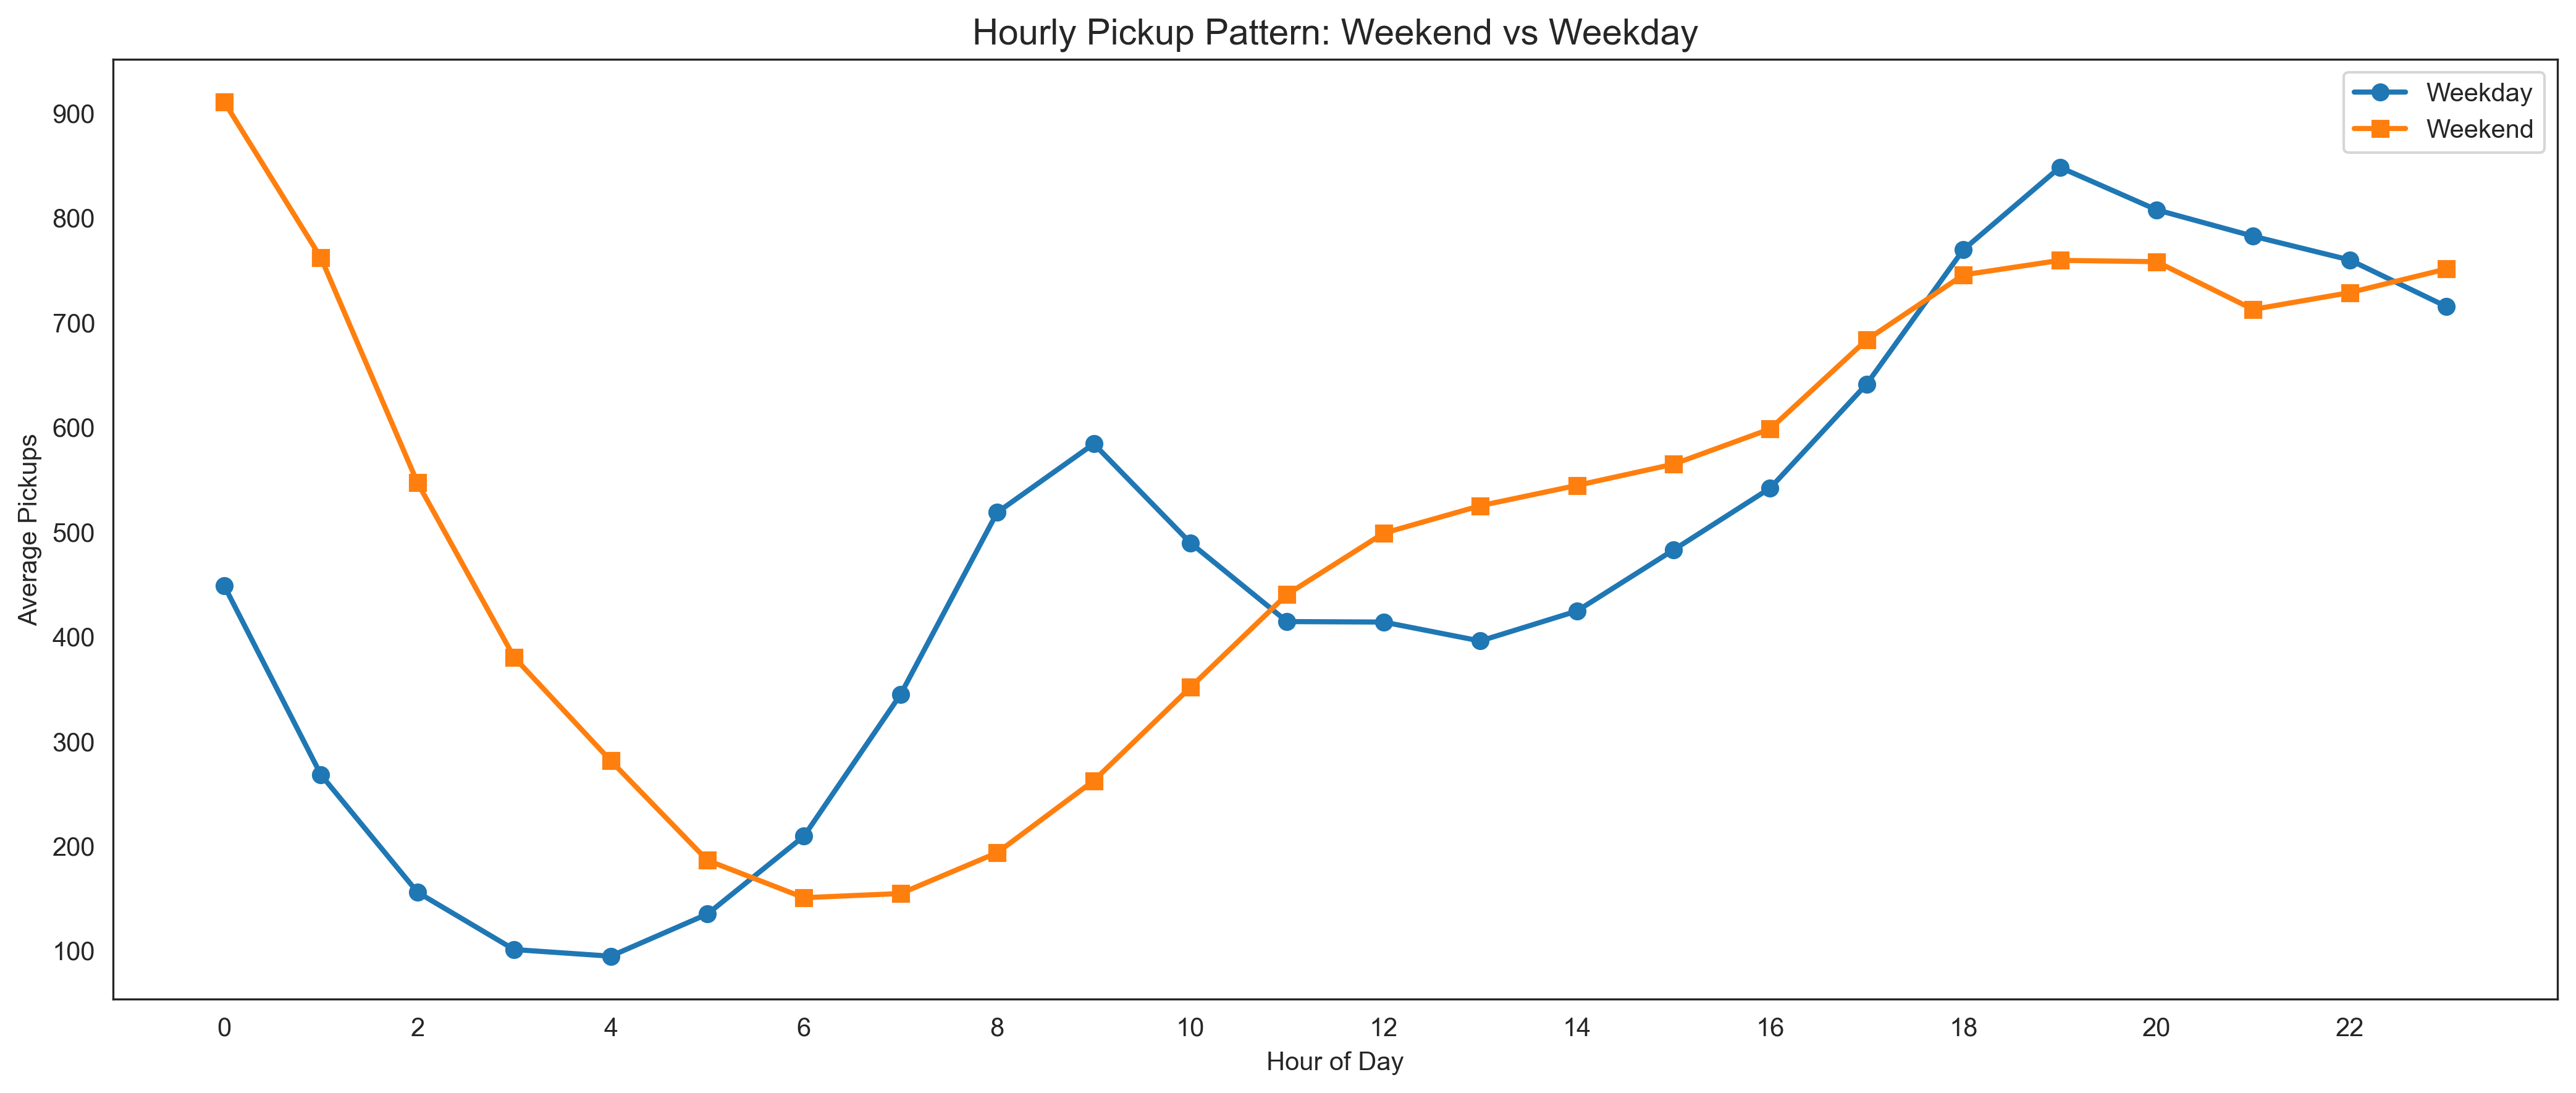

In [10]:
# Weekend + Hour interaction
weekend_hour = df.groupby(['is_weekend', 'hour'])['pickups'].mean().unstack(0)
fig, ax = plt.subplots(figsize=(14, 6), dpi=300)
ax.plot(weekend_hour.index, weekend_hour[False], marker='o', label='Weekday', linewidth=2)
ax.plot(weekend_hour.index, weekend_hour[True], marker='s', label='Weekend', linewidth=2)
ax.set_title('Hourly Pickup Pattern: Weekend vs Weekday', fontsize=14)
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Average Pickups')
ax.legend()
ax.grid(False)
ax.set_xticks(range(0, 24, 2))
plt.tight_layout()
plt.show()


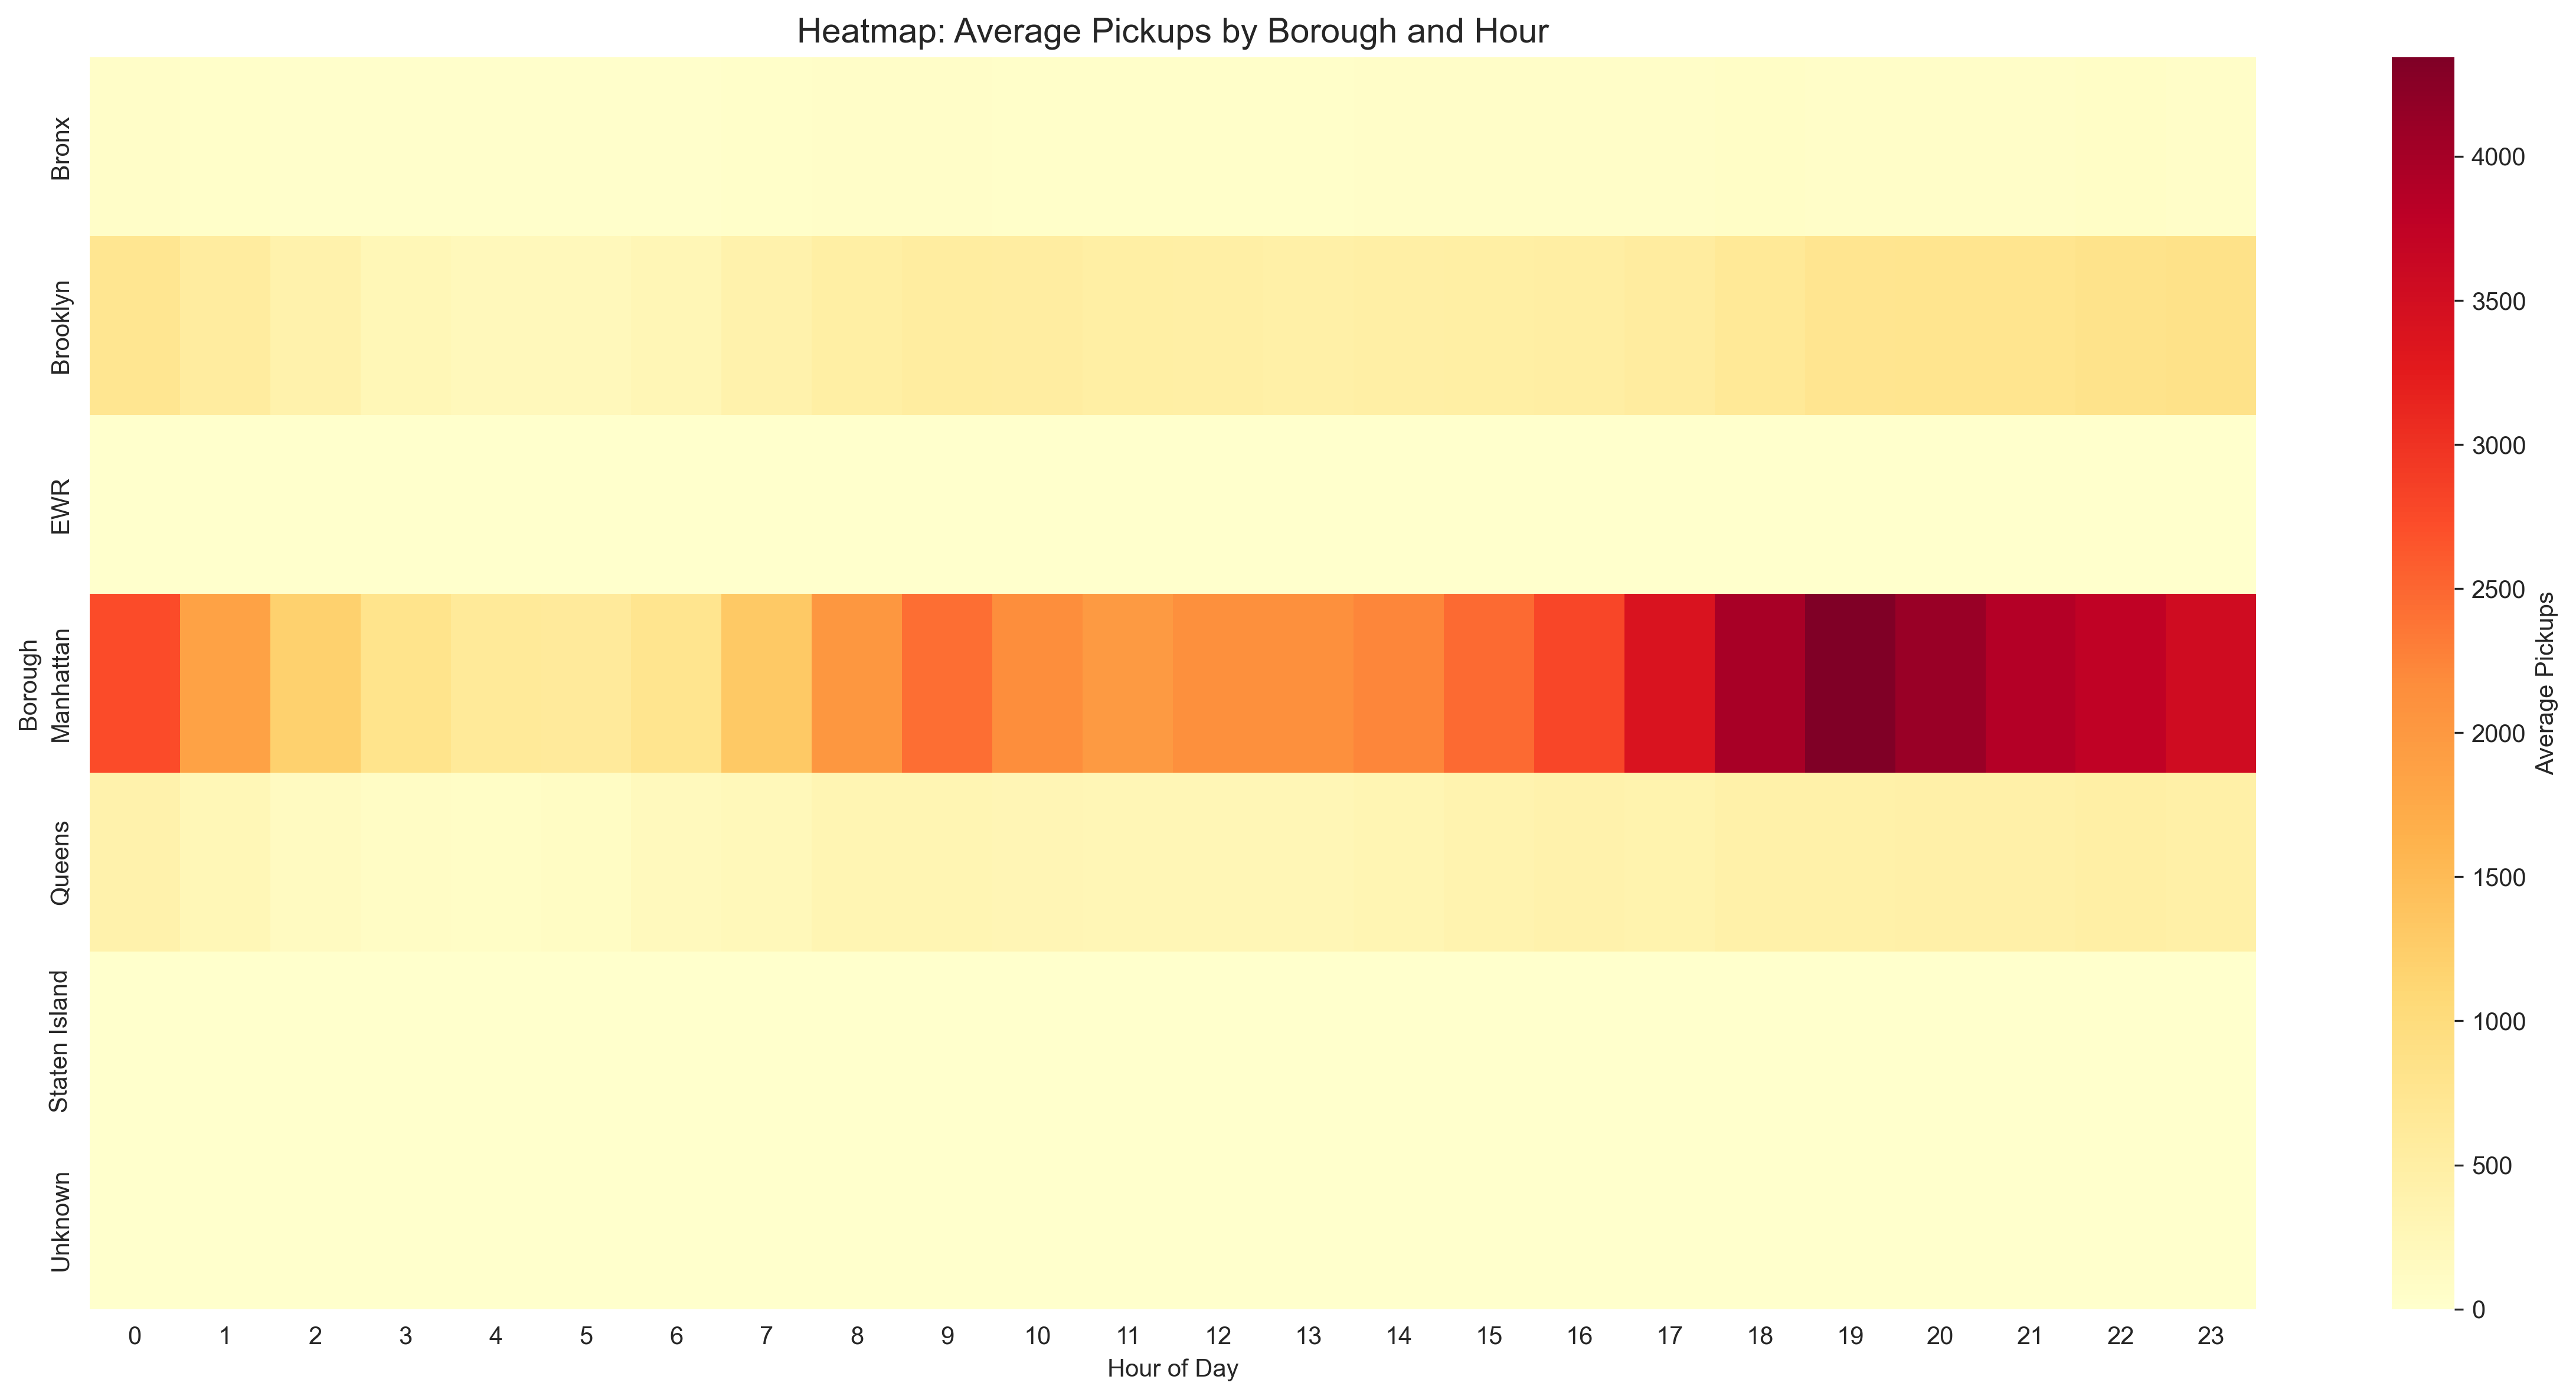

In [11]:
# Borough + Hour interaction (heatmap)
borough_hour = df.groupby(['borough', 'hour'])['pickups'].mean().unstack(0)
fig, ax = plt.subplots(figsize=(16, 8), dpi=300)
sns.heatmap(borough_hour.T, annot=False, fmt='.0f', cmap='YlOrRd', ax=ax, cbar_kws={'label': 'Average Pickups'})
ax.set_title('Heatmap: Average Pickups by Borough and Hour', fontsize=14)
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Borough')
plt.tight_layout()
plt.show()


## 9. Key Insights & Recommendations


In [12]:
# Calculate feature importance
feature_importance = abs(correlation_matrix['pickups']).sort_values(ascending=False)
feature_importance = feature_importance[feature_importance.index != 'pickups']

print("="*80)
print("KEY INSIGHTS & RECOMMENDATIONS")
print("="*80)

print("\n1. VARIABLES INFLUENCING PICKUPS:")
print("Based on correlation analysis, the following factors influence pickups:")
for i, (feature, importance) in enumerate(feature_importance.head(5).items(), 1):
    direction = "positive" if correlation_matrix.loc[feature, 'pickups'] > 0 else "negative"
    print(f"   {i}. {feature}: {importance:.3f} correlation ({direction})")

print("\n2. MOST INFLUENTIAL FACTOR:")
top_factor = feature_importance.index[0]
top_corr = correlation_matrix.loc[top_factor, 'pickups']
print(f"   Factor: {top_factor}")
print(f"   Correlation: {top_corr:.3f}")
if top_corr > 0:
    print("   Impact: Higher values of this factor are associated with more pickups")
else:
    print("   Impact: Higher values of this factor are associated with fewer pickups")

# Borough contribution
borough_pct = (borough_total / borough_total.sum() * 100).sort_values(ascending=False)
print("\n3. BOROUGH CONTRIBUTION:")
for borough, pct in borough_pct.items():
    print(f"   {borough:15s}: {pct:5.1f}%")

print("\n4. PEAK DEMAND TIMES:")
print(f"   Peak Hour: {hourly_pickups.idxmax()}:00 ({hourly_pickups.max():.0f} avg pickups)")
print(f"   Peak Day: {day_pickups.idxmax()} ({day_pickups.max():.0f} avg pickups)")
print(f"   Peak Month: {month_pickups.idxmax()} ({month_pickups.max():.0f} avg pickups)")

print("\n5. RECOMMENDATIONS TO UBER MANAGEMENT:")
print("\n   A. TEMPORAL OPTIMIZATION:")
print(f"      - Increase driver availability during peak hours ({hourly_pickups.idxmax()}:00)")
print(f"      - Focus on {day_pickups.idxmax()} for maximum demand")
print(f"      - Weekend demand is {100*(weekend_pickups[True]/weekend_pickups[False]-1):+.1f}% {'higher' if weekend_pickups[True] > weekend_pickups[False] else 'lower'} than weekdays")

print("\n   B. GEOGRAPHIC OPTIMIZATION:")
top_borough = borough_total.index[0]
print(f"      - {top_borough} accounts for {100*borough_total[top_borough]/borough_total.sum():.1f}% of total pickups")
print(f"      - Allocate more drivers to high-demand boroughs during peak times")

print("\n   C. WEATHER-BASED STRATEGIES:")
if abs(correlation_matrix.loc['temp', 'pickups']) > 0.1:
    print(f"      - Temperature shows {abs(correlation_matrix.loc['temp', 'pickups']):.3f} correlation with pickups")
    print("      - Adjust pricing/driver allocation based on temperature forecasts")
if (df['pcp01'] > 0).sum() > 0:
    precip_diff = precip_comparison[True] - precip_comparison[False]
    print(f"      - Precipitation affects demand: {precip_diff:+.0f} pickups difference")
    print("      - Increase surge pricing and driver incentives during precipitation")

print("\n   D. HOLIDAY STRATEGIES:")
holiday_diff = holiday_pickups[True] - holiday_pickups[False]
if holiday_diff > 0:
    print(f"      - Holidays show {holiday_diff:.0f} more average pickups")
    print("      - Increase driver capacity and adjust pricing for holidays")
else:
    print(f"      - Holidays show {abs(holiday_diff):.0f} fewer average pickups")
    print("      - Consider special promotions to boost holiday demand")

print("\n   E. DATA-DRIVEN PRICING:")
print("      - Implement dynamic pricing based on:")
print("        * Time of day (peak vs off-peak)")
print("        * Day of week (weekend vs weekday)")
print("        * Weather conditions (precipitation, temperature)")
print("        * Borough-specific demand patterns")

print("\n" + "="*80)


KEY INSIGHTS & RECOMMENDATIONS

1. VARIABLES INFLUENCING PICKUPS:
Based on correlation analysis, the following factors influence pickups:
   1. temp: 0.055 correlation (positive)
   2. dewp: 0.033 correlation (positive)
   3. pcp24: 0.020 correlation (negative)
   4. slp: 0.015 correlation (negative)
   5. spd: 0.011 correlation (positive)

2. MOST INFLUENTIAL FACTOR:
   Factor: temp
   Correlation: 0.055
   Impact: Higher values of this factor are associated with more pickups

3. BOROUGH CONTRIBUTION:
   Manhattan      :  72.7%
   Brooklyn       :  16.3%
   Queens         :   9.4%
   Bronx          :   1.5%
   Staten Island  :   0.0%
   Unknown        :   0.0%
   EWR            :   0.0%

4. PEAK DEMAND TIMES:
   Peak Hour: 19:00 (822 avg pickups)
   Peak Day: Saturday (572 avg pickups)
   Peak Month: June (575 avg pickups)

5. RECOMMENDATIONS TO UBER MANAGEMENT:

   A. TEMPORAL OPTIMIZATION:
      - Increase driver availability during peak hours (19:00)
      - Focus on Saturday for m